In [1]:
#Step 1: Import the model

from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

Using TensorFlow backend.
W1026 14:49:21.093270 139841651627840 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#%run end_to_end_data_prep_with_function.ipynb


In [7]:
#train the model
cur_dir = os.getcwd()
cur_dir

from tensorflow.keras.preprocessing import image
train_img_path = '/cxldata/skin_disease_1/HAM10000_images_draftv1/akiec/'
train_x = image.load_img(train_img_path,color_mode='rgb', target_size=(224, 224))
train_x
#model.fit()

NameError: name 'os' is not defined

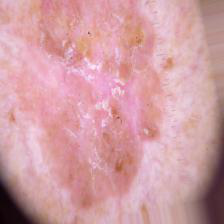

In [2]:
#Step 2: Loading a sample image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path = '/cxldata/skin_disease_1/HAM10000_images_draftv1/akiec/akiec_0_100.jpg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [3]:
#Step 3: Making the image size compatible with VGG16 input
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [4]:
#Step 4: Making the prediction
#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

40960/35363 [==================================] - 0s 0us/step


In [7]:
p

[[('n07615774', 'ice_lolly', 0.20451038),
  ('n07753113', 'fig', 0.16021769),
  ('n07860988', 'dough', 0.11125464),
  ('n03676483', 'lipstick', 0.061001305),
  ('n02786058', 'Band_Aid', 0.05079037)]]